In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Random Forest is for classifikation 
# Random Forest make several decision trees (n_estimators=3) with several branches (max_depth=5)
# Random Forest get random subsets from the dataset, so it could be that a decision tree choose a other root node
# or other value with the same root node (some feature)
# each decision is counted for the majority vote
# Helps avoid overfitting (one tree might be wrong, but many together are smart)


# data = {
# 'age': [23, 18, 21, 35, 45, 50, 65, 70, 37, 25],
# 'genre': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
# 'duration': [90, 120, 95, 110, 130, 100, 85, 105, 115, 140],
# 'like': [1, 1, 1, 1, 0, 1, 0, 0, 1, 0]
# }

data = {
    'age': [28, 32, 41, 55, 60, 22, 38, 49, 68, 30, 25, 36, 51, 44, 29],
    'time_spent_minutes': [15.5, 45.0, 8.2, 30.1, 5.9, 50.5, 12.0, 35.8, 4.1, 25.7, 18.0, 40.5, 7.5, 33.0, 10.2],
    'items_viewed': [5, 18, 3, 10, 2, 15, 6, 12, 1, 9, 7, 14, 4, 11, 5],
    'returning_customer': [0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], # 0: Neuer Kunde, 1: Wiederkehrender Kunde
    'made_purchase': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]     # 0: Kein Kauf, 1: Kauf getätigt (Zielvariable)
}

df = pd.DataFrame(data)

X = df[['age', 'time_spent_minutes', 'items_viewed', 'returning_customer']]
y = df['made_purchase']
# n_estimator = how many trees  max_depth = how many branches random_state = Use for repucity 
model = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)
model.fit(X, y)

# print(model.predict([[40, 18.5, 12, 0]])) # new_person

# Daten für die Vorhersage als DataFrame erstellen
new_person_data = pd.DataFrame([[40, 18.5, 12, 0]], 
                               columns=['age', 'time_spent_minutes', 'items_viewed', 'returning_customer'])

# Vorhersage machen
prediction = model.predict(new_person_data)

print(prediction) # Zeigt die Vorhersage an


[1]


Text(0.5, 1.0, 'Decision Tree 3')

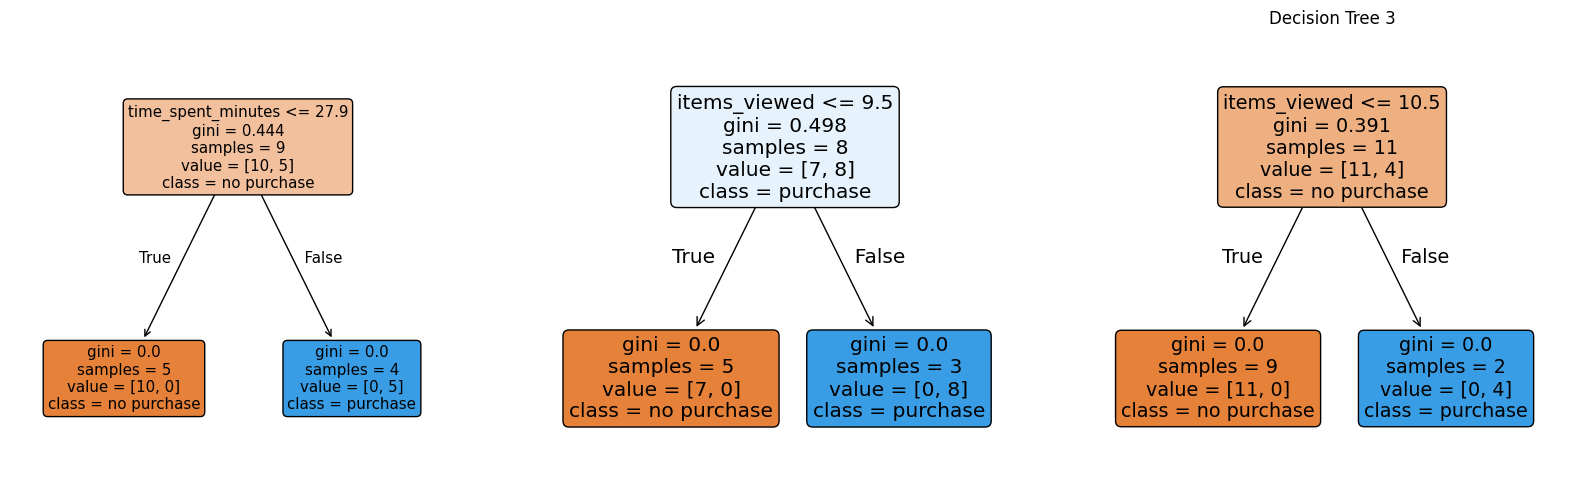

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#Plot each of the 3 trees using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=100)

for i, estimator in enumerate(model.estimators_):
    plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=['no purchase', 'purchase'],
    filled=True,
    rounded=True,
    ax=axes[i]
    )
axes[i].set_title(f"Decision Tree {i + 1}")

# new_person_data = pd.DataFrame([[40, 18.5, 12, 0]], 
                               #columns=['age', 'time_spent_minutes', 'items_viewed', 'returning_customer'])


In [ ]:
s